In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

In [ ]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [ ]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass.csv


In [ ]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,0
1,2,DSCF0900.JPG,800,specialty,0
2,3,DSCF0904.JPG,1250,specialty,0
3,4,DSCF0905.JPG,400,specialty,0
4,5,DSCF0910.JPG,800,specialty,0
...,...,...,...,...,...
895,896,DSCF2197.JPG,800,off,4
896,897,DSCF2198.JPG,1250,off,4
897,898,DSCF2200.JPG,400,off,4
898,899,DSCF2201.JPG,800,off,4


In [ ]:
width = 265#1920#530#265
height = 265#149#1024#298#149

In [ ]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/900 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13F74D9B0>


  0%|          | 1/900 [00:00<05:15,  2.85it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEBC2B0>


  0%|          | 2/900 [00:00<04:54,  3.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEAA6A0>


  0%|          | 3/900 [00:00<04:42,  3.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE1EC88>


  0%|          | 4/900 [00:01<04:29,  3.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDA35F8>


  1%|          | 5/900 [00:01<04:24,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDE390>


  1%|          | 6/900 [00:01<04:19,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDFA518>


  1%|          | 7/900 [00:02<04:11,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0E518>


  1%|          | 8/900 [00:02<04:11,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13F74DB38>


  1%|          | 9/900 [00:02<04:16,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDE6828>


  1%|          | 10/900 [00:02<04:13,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDED2B0>


  1%|          | 11/900 [00:03<04:13,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDE8240>


  1%|▏         | 12/900 [00:03<04:19,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDF0320>


  1%|▏         | 13/900 [00:03<04:15,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDF2D68>


  2%|▏         | 14/900 [00:04<04:15,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDF39B0>


  2%|▏         | 15/900 [00:04<04:18,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13F74D9B0>


  2%|▏         | 16/900 [00:04<04:16,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EDF9668>


  2%|▏         | 17/900 [00:04<04:16,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE00860>


  2%|▏         | 18/900 [00:05<04:23,  3.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE02470>


  2%|▏         | 19/900 [00:05<04:19,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE01C18>


  2%|▏         | 20/900 [00:05<04:18,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13F74D9B0>


  2%|▏         | 21/900 [00:06<04:19,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13F74DB38>


  2%|▏         | 22/900 [00:06<04:17,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07828>


  3%|▎         | 23/900 [00:06<04:16,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09EB8>


  3%|▎         | 24/900 [00:06<04:17,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09668>


  3%|▎         | 25/900 [00:07<04:14,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09CF8>


  3%|▎         | 26/900 [00:07<04:15,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE090B8>


  3%|▎         | 27/900 [00:07<04:15,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07828>


  3%|▎         | 28/900 [00:08<04:14,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09CF8>


  3%|▎         | 29/900 [00:08<04:11,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09B38>


  3%|▎         | 30/900 [00:08<04:17,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07588>


  3%|▎         | 31/900 [00:09<04:16,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09F60>


  4%|▎         | 32/900 [00:09<04:15,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09978>


  4%|▎         | 33/900 [00:09<04:17,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07828>


  4%|▍         | 34/900 [00:09<04:13,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09DD8>


  4%|▍         | 35/900 [00:10<04:12,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09438>


  4%|▍         | 36/900 [00:10<04:16,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07E10>


  4%|▍         | 37/900 [00:10<04:11,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09E48>


  4%|▍         | 38/900 [00:11<04:10,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07F98>


  4%|▍         | 39/900 [00:11<04:11,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07278>


  4%|▍         | 40/900 [00:11<04:05,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07588>


  5%|▍         | 41/900 [00:11<04:05,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07470>


  5%|▍         | 42/900 [00:12<04:06,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE079B0>


  5%|▍         | 43/900 [00:12<04:03,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE07588>


  5%|▍         | 44/900 [00:12<04:04,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09A58>


  5%|▌         | 45/900 [00:13<04:07,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09048>


  5%|▌         | 46/900 [00:13<04:03,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE091D0>


  5%|▌         | 47/900 [00:13<04:04,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09898>


  5%|▌         | 48/900 [00:13<04:04,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09978>


  5%|▌         | 49/900 [00:14<04:04,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09F98>


  6%|▌         | 50/900 [00:14<04:04,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09828>


  6%|▌         | 51/900 [00:14<04:11,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE091D0>


  6%|▌         | 52/900 [00:15<04:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09898>


  6%|▌         | 53/900 [00:15<04:06,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09978>


  6%|▌         | 54/900 [00:15<04:14,  3.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09DD8>


  6%|▌         | 55/900 [00:15<04:06,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09048>


  6%|▌         | 56/900 [00:16<04:03,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE09048>


  6%|▋         | 57/900 [00:16<04:04,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC198>


  6%|▋         | 58/900 [00:16<04:00,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC6A0>


  7%|▋         | 59/900 [00:17<03:57,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC9B0>


  7%|▋         | 60/900 [00:17<03:58,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCB00>


  7%|▋         | 61/900 [00:17<03:56,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC780>


  7%|▋         | 62/900 [00:17<03:55,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC898>


  7%|▋         | 63/900 [00:18<03:56,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC860>


  7%|▋         | 64/900 [00:18<03:52,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCD68>


  7%|▋         | 65/900 [00:18<03:54,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC898>


  7%|▋         | 66/900 [00:19<03:55,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCCC0>


  7%|▋         | 67/900 [00:19<03:53,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC9E8>


  8%|▊         | 68/900 [00:19<03:55,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC320>


  8%|▊         | 69/900 [00:19<03:57,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC668>


  8%|▊         | 70/900 [00:20<03:58,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC390>


  8%|▊         | 71/900 [00:20<03:59,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC518>


  8%|▊         | 72/900 [00:20<04:00,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC6D8>


  8%|▊         | 73/900 [00:21<03:54,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCB70>


  8%|▊         | 74/900 [00:21<03:52,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCB38>


  8%|▊         | 75/900 [00:21<03:55,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC710>


  8%|▊         | 76/900 [00:21<03:52,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC3C8>


  9%|▊         | 77/900 [00:22<03:54,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCCF8>


  9%|▊         | 78/900 [00:22<03:56,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC208>


  9%|▉         | 79/900 [00:22<03:56,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCC88>


  9%|▉         | 80/900 [00:23<03:56,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC630>


  9%|▉         | 81/900 [00:23<03:59,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC7B8>


  9%|▉         | 82/900 [00:23<03:57,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCA58>


  9%|▉         | 83/900 [00:23<03:54,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC8D0>


  9%|▉         | 84/900 [00:24<03:56,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCFD0>


  9%|▉         | 85/900 [00:24<03:53,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC160>


 10%|▉         | 86/900 [00:24<03:55,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCA20>


 10%|▉         | 87/900 [00:25<03:56,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCA58>


 10%|▉         | 88/900 [00:25<03:51,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCAC8>


 10%|▉         | 89/900 [00:25<03:52,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCEF0>


 10%|█         | 90/900 [00:25<03:54,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCF60>


 10%|█         | 91/900 [00:26<03:54,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCAC8>


 10%|█         | 92/900 [00:26<03:52,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDCAC8>


 10%|█         | 93/900 [00:26<04:02,  3.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BCC0>


 10%|█         | 94/900 [00:27<03:55,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC2E8>


 11%|█         | 95/900 [00:27<03:54,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EEDC7B8>


 11%|█         | 96/900 [00:27<03:56,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B128>


 11%|█         | 97/900 [00:28<03:50,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B780>


 11%|█         | 98/900 [00:28<03:51,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B630>


 11%|█         | 99/900 [00:28<03:51,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B7B8>


 11%|█         | 100/900 [00:28<03:50,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BF60>


 11%|█         | 101/900 [00:29<03:47,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BE80>


 11%|█▏        | 102/900 [00:29<03:49,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B320>


 11%|█▏        | 103/900 [00:29<03:48,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B630>


 12%|█▏        | 104/900 [00:30<03:47,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B2B0>


 12%|█▏        | 105/900 [00:30<03:48,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B080>


 12%|█▏        | 106/900 [00:30<03:45,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B0F0>


 12%|█▏        | 107/900 [00:30<03:45,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B6D8>


 12%|█▏        | 108/900 [00:31<03:46,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B940>


 12%|█▏        | 109/900 [00:31<03:45,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BAC8>


 12%|█▏        | 110/900 [00:31<03:43,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B208>


 12%|█▏        | 111/900 [00:32<03:47,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BCF8>


 12%|█▏        | 112/900 [00:32<03:44,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BC88>


 13%|█▎        | 113/900 [00:32<03:43,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B198>


 13%|█▎        | 114/900 [00:32<03:46,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B828>


 13%|█▎        | 115/900 [00:33<03:43,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BA90>


 13%|█▎        | 116/900 [00:33<03:44,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B240>


 13%|█▎        | 117/900 [00:33<03:44,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BC18>


 13%|█▎        | 118/900 [00:34<03:44,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BE48>


 13%|█▎        | 119/900 [00:34<03:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BB00>


 13%|█▎        | 120/900 [00:34<03:47,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B400>


 13%|█▎        | 121/900 [00:34<03:44,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B588>


 14%|█▎        | 122/900 [00:35<03:43,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BB70>


 14%|█▎        | 123/900 [00:35<03:45,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B710>


 14%|█▍        | 124/900 [00:35<03:44,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BE48>


 14%|█▍        | 125/900 [00:36<03:42,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B4A8>


 14%|█▍        | 126/900 [00:36<03:45,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B710>


 14%|█▍        | 127/900 [00:36<03:42,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B588>


 14%|█▍        | 128/900 [00:36<03:43,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0B4A8>


 14%|█▍        | 129/900 [00:37<03:44,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE067F0>


 14%|█▍        | 130/900 [00:37<03:40,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE0BEB8>


 15%|█▍        | 131/900 [00:37<03:41,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE067F0>


 15%|█▍        | 132/900 [00:38<03:51,  3.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06C50>


 15%|█▍        | 133/900 [00:38<03:43,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06748>


 15%|█▍        | 134/900 [00:38<03:41,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06048>


 15%|█▌        | 135/900 [00:38<03:47,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06E80>


 15%|█▌        | 136/900 [00:39<03:42,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE060F0>


 15%|█▌        | 137/900 [00:39<03:42,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06518>


 15%|█▌        | 138/900 [00:39<03:43,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE064E0>


 15%|█▌        | 139/900 [00:40<03:42,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06B00>


 16%|█▌        | 140/900 [00:40<03:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE066A0>


 16%|█▌        | 141/900 [00:40<03:41,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06470>


 16%|█▌        | 142/900 [00:41<03:37,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06E48>


 16%|█▌        | 143/900 [00:41<03:38,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06AC8>


 16%|█▌        | 144/900 [00:41<03:37,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06BE0>


 16%|█▌        | 145/900 [00:41<03:34,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06D68>


 16%|█▌        | 146/900 [00:42<03:35,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06C88>


 16%|█▋        | 147/900 [00:42<03:37,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE068D0>


 16%|█▋        | 148/900 [00:42<03:35,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06208>


 17%|█▋        | 149/900 [00:43<03:37,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06DA0>


 17%|█▋        | 150/900 [00:43<03:37,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06A20>


 17%|█▋        | 151/900 [00:43<03:33,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06080>


 17%|█▋        | 152/900 [00:43<03:32,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06B38>


 17%|█▋        | 153/900 [00:44<03:35,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06898>


 17%|█▋        | 154/900 [00:44<03:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE062B0>


 17%|█▋        | 155/900 [00:44<03:32,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06780>


 17%|█▋        | 156/900 [00:45<03:35,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06828>


 17%|█▋        | 157/900 [00:45<03:33,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06E10>


 18%|█▊        | 158/900 [00:45<03:33,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06F98>


 18%|█▊        | 159/900 [00:45<03:33,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06240>


 18%|█▊        | 160/900 [00:46<03:32,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE062B0>


 18%|█▊        | 161/900 [00:46<03:30,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06828>


 18%|█▊        | 162/900 [00:46<03:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06E10>


 18%|█▊        | 163/900 [00:47<03:29,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06D30>


 18%|█▊        | 164/900 [00:47<03:28,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06828>


 18%|█▊        | 165/900 [00:47<03:31,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE06828>


 18%|█▊        | 166/900 [00:47<03:28,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21B00>


 19%|█▊        | 167/900 [00:48<03:29,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE217F0>


 19%|█▊        | 168/900 [00:48<03:33,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21390>


 19%|█▉        | 169/900 [00:48<03:28,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21A90>


 19%|█▉        | 170/900 [00:49<03:26,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21748>


 19%|█▉        | 171/900 [00:49<03:34,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21390>


 19%|█▉        | 172/900 [00:49<03:27,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE214E0>


 19%|█▉        | 173/900 [00:49<03:23,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21240>


 19%|█▉        | 174/900 [00:50<03:24,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21DD8>


 19%|█▉        | 175/900 [00:50<03:21,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21080>


 20%|█▉        | 176/900 [00:50<03:20,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21940>


 20%|█▉        | 177/900 [00:50<03:21,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE210B8>


 20%|█▉        | 178/900 [00:51<03:19,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21C18>


 20%|█▉        | 179/900 [00:51<03:17,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132585160>


 20%|██        | 180/900 [00:51<03:20,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132529320>


 20%|██        | 181/900 [00:52<03:19,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1325292E8>


 20%|██        | 182/900 [00:52<03:21,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132529320>


 20%|██        | 183/900 [00:52<03:21,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1325C5198>


 20%|██        | 184/900 [00:52<03:17,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132549278>


 21%|██        | 185/900 [00:53<03:17,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132549278>


 21%|██        | 186/900 [00:53<03:18,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1325C5198>


 21%|██        | 187/900 [00:53<03:15,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1325291D0>


 21%|██        | 188/900 [00:54<03:13,  3.67it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1325660F0>


 21%|██        | 189/900 [00:54<03:17,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324EB240>


 21%|██        | 190/900 [00:54<03:14,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132566160>


 21%|██        | 191/900 [00:54<03:14,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324EB240>


 21%|██▏       | 192/900 [00:55<03:16,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324EB240>


 21%|██▏       | 193/900 [00:55<03:14,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132549358>


 22%|██▏       | 194/900 [00:55<03:14,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132549358>


 22%|██▏       | 195/900 [00:55<03:15,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD132549358>


 22%|██▏       | 196/900 [00:56<03:15,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21AC8>


 22%|██▏       | 197/900 [00:56<03:14,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21A90>


 22%|██▏       | 198/900 [00:56<03:14,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE212E8>


 22%|██▏       | 199/900 [00:57<03:11,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21518>


 22%|██▏       | 200/900 [00:57<03:12,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21400>


 22%|██▏       | 201/900 [00:57<03:13,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21278>


 22%|██▏       | 202/900 [00:57<03:10,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE216D8>


 23%|██▎       | 203/900 [00:58<03:10,  3.67it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21C88>


 23%|██▎       | 204/900 [00:58<03:13,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21278>


 23%|██▎       | 205/900 [00:58<03:09,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21CC0>


 23%|██▎       | 206/900 [00:58<03:08,  3.69it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21518>


 23%|██▎       | 207/900 [00:59<03:11,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE214A8>


 23%|██▎       | 208/900 [00:59<03:12,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21358>


 23%|██▎       | 209/900 [00:59<03:12,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21198>


 23%|██▎       | 210/900 [01:00<03:12,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21A58>


 23%|██▎       | 211/900 [01:00<03:10,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21F28>


 24%|██▎       | 212/900 [01:00<03:09,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21898>


 24%|██▎       | 213/900 [01:00<03:09,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21710>


 24%|██▍       | 214/900 [01:01<03:08,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21358>


 24%|██▍       | 215/900 [01:01<03:16,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21898>


 24%|██▍       | 216/900 [01:01<03:20,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21358>


 24%|██▍       | 217/900 [01:02<03:15,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21A58>


 24%|██▍       | 218/900 [01:02<03:15,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21A58>


 24%|██▍       | 219/900 [01:02<03:16,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE21198>


 24%|██▍       | 220/900 [01:02<03:15,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33D30>


 25%|██▍       | 221/900 [01:03<03:13,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33CC0>


 25%|██▍       | 222/900 [01:03<03:16,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33DA0>


 25%|██▍       | 223/900 [01:03<03:12,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE339B0>


 25%|██▍       | 224/900 [01:04<03:10,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33828>


 25%|██▌       | 225/900 [01:04<03:12,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33AC8>


 25%|██▌       | 226/900 [01:04<03:09,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33E48>


 25%|██▌       | 227/900 [01:04<03:06,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33668>


 25%|██▌       | 228/900 [01:05<03:09,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33518>


 25%|██▌       | 229/900 [01:05<03:09,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33E48>


 26%|██▌       | 230/900 [01:05<03:07,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE334E0>


 26%|██▌       | 231/900 [01:06<03:09,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33C50>


 26%|██▌       | 232/900 [01:06<03:08,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33BA8>


 26%|██▌       | 233/900 [01:06<03:07,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33550>


 26%|██▌       | 234/900 [01:06<03:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33630>


 26%|██▌       | 235/900 [01:07<03:06,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE337B8>


 26%|██▌       | 236/900 [01:07<03:08,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE338D0>


 26%|██▋       | 237/900 [01:07<03:09,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE335C0>


 26%|██▋       | 238/900 [01:08<03:05,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33240>


 27%|██▋       | 239/900 [01:08<03:06,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE339E8>


 27%|██▋       | 240/900 [01:08<03:08,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE334A8>


 27%|██▋       | 241/900 [01:08<03:06,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33F60>


 27%|██▋       | 242/900 [01:09<03:07,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE332B0>


 27%|██▋       | 243/900 [01:09<03:09,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33358>


 27%|██▋       | 244/900 [01:09<03:06,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33A90>


 27%|██▋       | 245/900 [01:10<03:08,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33A58>


 27%|██▋       | 246/900 [01:10<03:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33F60>


 27%|██▋       | 247/900 [01:10<03:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33A90>


 28%|██▊       | 248/900 [01:10<03:05,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33780>


 28%|██▊       | 249/900 [01:11<03:07,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE332B0>


 28%|██▊       | 250/900 [01:11<03:06,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33A58>


 28%|██▊       | 251/900 [01:11<03:04,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33F60>


 28%|██▊       | 252/900 [01:12<03:05,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33278>


 28%|██▊       | 253/900 [01:12<03:04,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33A20>


 28%|██▊       | 254/900 [01:12<03:03,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE332B0>


 28%|██▊       | 255/900 [01:12<03:04,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE332B0>


 28%|██▊       | 256/900 [01:13<03:03,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE33EF0>


 29%|██▊       | 257/900 [01:13<03:04,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B9E8>


 29%|██▊       | 258/900 [01:13<03:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BDD8>


 29%|██▉       | 259/900 [01:14<03:03,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B0B8>


 29%|██▉       | 260/900 [01:14<03:01,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B3C8>


 29%|██▉       | 261/900 [01:14<03:03,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B4A8>


 29%|██▉       | 262/900 [01:14<03:00,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B828>


 29%|██▉       | 263/900 [01:15<03:00,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BBA8>


 29%|██▉       | 264/900 [01:15<03:02,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BB00>


 29%|██▉       | 265/900 [01:15<03:02,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B6D8>


 30%|██▉       | 266/900 [01:16<03:01,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B7B8>


 30%|██▉       | 267/900 [01:16<03:00,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B940>


 30%|██▉       | 268/900 [01:16<02:59,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BD30>


 30%|██▉       | 269/900 [01:16<02:58,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BA90>


 30%|███       | 270/900 [01:17<03:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B128>


 30%|███       | 271/900 [01:17<02:57,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BE48>


 30%|███       | 272/900 [01:17<02:58,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B470>


 30%|███       | 273/900 [01:18<02:59,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B6A0>


 30%|███       | 274/900 [01:18<02:57,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B898>


 31%|███       | 275/900 [01:18<02:56,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BCF8>


 31%|███       | 276/900 [01:18<02:57,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B5F8>


 31%|███       | 277/900 [01:19<02:55,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BF98>


 31%|███       | 278/900 [01:19<02:55,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B9B0>


 31%|███       | 279/900 [01:19<02:58,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BEF0>


 31%|███       | 280/900 [01:20<02:56,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B630>


 31%|███       | 281/900 [01:20<02:57,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B5F8>


 31%|███▏      | 282/900 [01:20<02:58,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BEB8>


 31%|███▏      | 283/900 [01:20<02:54,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BC50>


 32%|███▏      | 284/900 [01:21<02:53,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B668>


 32%|███▏      | 285/900 [01:21<02:57,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B630>


 32%|███▏      | 286/900 [01:21<02:56,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3B5F8>


 32%|███▏      | 287/900 [01:22<02:53,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BEB8>


 32%|███▏      | 288/900 [01:22<02:56,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BC50>


 32%|███▏      | 289/900 [01:22<02:54,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BEF0>


 32%|███▏      | 290/900 [01:22<02:52,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BEB8>


 32%|███▏      | 291/900 [01:23<02:51,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5ACC0>


 32%|███▏      | 292/900 [01:23<02:50,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE3BA58>


 33%|███▎      | 293/900 [01:23<02:50,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AC50>


 33%|███▎      | 294/900 [01:24<02:54,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A978>


 33%|███▎      | 295/900 [01:24<02:50,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A518>


 33%|███▎      | 296/900 [01:24<02:50,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AAC8>


 33%|███▎      | 297/900 [01:24<02:53,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A978>


 33%|███▎      | 298/900 [01:25<02:51,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AD68>


 33%|███▎      | 299/900 [01:25<02:51,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A7B8>


 33%|███▎      | 300/900 [01:25<02:52,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A630>


 33%|███▎      | 301/900 [01:25<02:49,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AB70>


 34%|███▎      | 302/900 [01:26<02:49,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AA20>


 34%|███▎      | 303/900 [01:26<02:50,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A438>


 34%|███▍      | 304/900 [01:26<02:48,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A6A0>


 34%|███▍      | 305/900 [01:27<02:47,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A630>


 34%|███▍      | 306/900 [01:27<02:48,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AE80>


 34%|███▍      | 307/900 [01:27<02:48,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A240>


 34%|███▍      | 308/900 [01:27<02:48,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AE48>


 34%|███▍      | 309/900 [01:28<02:48,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A828>


 34%|███▍      | 310/900 [01:28<02:46,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A400>


 35%|███▍      | 311/900 [01:28<02:48,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A2E8>


 35%|███▍      | 312/900 [01:29<02:49,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5ABE0>


 35%|███▍      | 313/900 [01:29<02:47,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A358>


 35%|███▍      | 314/900 [01:29<02:47,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A6D8>


 35%|███▌      | 315/900 [01:29<02:49,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A668>


 35%|███▌      | 316/900 [01:30<02:47,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A518>


 35%|███▌      | 317/900 [01:30<02:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A748>


 35%|███▌      | 318/900 [01:30<02:47,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A320>


 35%|███▌      | 319/900 [01:31<02:44,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AEB8>


 36%|███▌      | 320/900 [01:31<02:43,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5ADA0>


 36%|███▌      | 321/900 [01:31<02:46,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A160>


 36%|███▌      | 322/900 [01:31<02:44,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A518>


 36%|███▌      | 323/900 [01:32<02:44,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A390>


 36%|███▌      | 324/900 [01:32<02:45,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AA58>


 36%|███▌      | 325/900 [01:32<02:43,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5AD30>


 36%|███▌      | 326/900 [01:33<02:42,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A390>


 36%|███▋      | 327/900 [01:33<02:42,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE5A668>


 36%|███▋      | 328/900 [01:33<02:42,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F588>


 37%|███▋      | 329/900 [01:33<02:42,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FBE0>


 37%|███▋      | 330/900 [01:34<02:43,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FCC0>


 37%|███▋      | 331/900 [01:34<02:40,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FBE0>


 37%|███▋      | 332/900 [01:34<02:39,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F780>


 37%|███▋      | 333/900 [01:35<02:40,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FB70>


 37%|███▋      | 334/900 [01:35<02:39,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F908>


 37%|███▋      | 335/900 [01:35<02:40,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F780>


 37%|███▋      | 336/900 [01:35<02:41,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FEB8>


 37%|███▋      | 337/900 [01:36<02:39,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FDD8>


 38%|███▊      | 338/900 [01:36<02:40,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F128>


 38%|███▊      | 339/900 [01:36<02:41,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FD30>


 38%|███▊      | 340/900 [01:37<02:37,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FB38>


 38%|███▊      | 341/900 [01:37<02:39,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F9E8>


 38%|███▊      | 342/900 [01:37<02:40,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F390>


 38%|███▊      | 343/900 [01:37<02:41,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F860>


 38%|███▊      | 344/900 [01:38<02:40,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F3C8>


 38%|███▊      | 345/900 [01:38<02:41,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FD68>


 38%|███▊      | 346/900 [01:38<02:39,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F748>


 39%|███▊      | 347/900 [01:39<02:37,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F518>


 39%|███▊      | 348/900 [01:39<02:38,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FAC8>


 39%|███▉      | 349/900 [01:39<02:36,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F400>


 39%|███▉      | 350/900 [01:39<02:36,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FE10>


 39%|███▉      | 351/900 [01:40<02:36,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F4A8>


 39%|███▉      | 352/900 [01:40<02:34,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F160>


 39%|███▉      | 353/900 [01:40<02:34,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FFD0>


 39%|███▉      | 354/900 [01:41<02:35,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FF98>


 39%|███▉      | 355/900 [01:41<02:33,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F668>


 40%|███▉      | 356/900 [01:41<02:34,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FC88>


 40%|███▉      | 357/900 [01:41<02:36,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FA90>


 40%|███▉      | 358/900 [01:42<02:33,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FFD0>


 40%|███▉      | 359/900 [01:42<02:31,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FF98>


 40%|████      | 360/900 [01:42<02:35,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F278>


 40%|████      | 361/900 [01:43<02:34,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FBA8>


 40%|████      | 362/900 [01:43<02:32,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6FF98>


 40%|████      | 363/900 [01:43<02:34,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B630>


 40%|████      | 364/900 [01:43<02:33,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F4A8>


 41%|████      | 365/900 [01:44<02:33,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B5F8>


 41%|████      | 366/900 [01:44<02:34,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE6F4A8>


 41%|████      | 367/900 [01:44<02:31,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B5F8>


 41%|████      | 368/900 [01:45<02:31,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BB38>


 41%|████      | 369/900 [01:45<02:34,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B390>


 41%|████      | 370/900 [01:45<02:33,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B5F8>


 41%|████      | 371/900 [01:45<02:33,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BF98>


 41%|████▏     | 372/900 [01:46<02:33,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B588>


 41%|████▏     | 373/900 [01:46<02:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B0F0>


 42%|████▏     | 374/900 [01:46<02:29,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B320>


 42%|████▏     | 375/900 [01:47<02:32,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B5F8>


 42%|████▏     | 376/900 [01:47<02:29,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BE10>


 42%|████▏     | 377/900 [01:47<02:29,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B400>


 42%|████▏     | 378/900 [01:47<02:31,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BB38>


 42%|████▏     | 379/900 [01:48<02:28,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B630>


 42%|████▏     | 380/900 [01:48<02:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BD30>


 42%|████▏     | 381/900 [01:48<02:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BD68>


 42%|████▏     | 382/900 [01:49<02:27,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B6D8>


 43%|████▎     | 383/900 [01:49<02:27,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B160>


 43%|████▎     | 384/900 [01:49<02:28,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BCC0>


 43%|████▎     | 385/900 [01:49<02:27,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B780>


 43%|████▎     | 386/900 [01:50<02:28,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BBE0>


 43%|████▎     | 387/900 [01:50<02:28,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BF28>


 43%|████▎     | 388/900 [01:50<02:26,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B240>


 43%|████▎     | 389/900 [01:51<02:26,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B7F0>


 43%|████▎     | 390/900 [01:51<02:26,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B3C8>


 43%|████▎     | 391/900 [01:51<02:24,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B198>


 44%|████▎     | 392/900 [01:51<02:25,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B940>


 44%|████▎     | 393/900 [01:52<02:27,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BC18>


 44%|████▍     | 394/900 [01:52<02:25,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B7F0>


 44%|████▍     | 395/900 [01:52<02:24,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B470>


 44%|████▍     | 396/900 [01:53<02:26,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7BEB8>


 44%|████▍     | 397/900 [01:53<02:24,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B240>


 44%|████▍     | 398/900 [01:53<02:23,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B470>


 44%|████▍     | 399/900 [01:54<02:25,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE7B7F0>


 44%|████▍     | 400/900 [01:54<02:23,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71860>


 45%|████▍     | 401/900 [01:54<02:24,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71BA8>


 45%|████▍     | 402/900 [01:54<02:23,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE716D8>


 45%|████▍     | 403/900 [01:55<02:21,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE714A8>


 45%|████▍     | 404/900 [01:55<02:21,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71198>


 45%|████▌     | 405/900 [01:55<02:22,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71E80>


 45%|████▌     | 406/900 [01:56<02:20,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71DA0>


 45%|████▌     | 407/900 [01:56<02:21,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE718D0>


 45%|████▌     | 408/900 [01:56<02:22,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71588>


 45%|████▌     | 409/900 [01:56<02:20,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE719E8>


 46%|████▌     | 410/900 [01:57<02:20,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71128>


 46%|████▌     | 411/900 [01:57<02:21,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71550>


 46%|████▌     | 412/900 [01:57<02:19,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71A58>


 46%|████▌     | 413/900 [01:58<02:18,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71668>


 46%|████▌     | 414/900 [01:58<02:20,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE716A0>


 46%|████▌     | 415/900 [01:58<02:19,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71F60>


 46%|████▌     | 416/900 [01:58<02:18,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71048>


 46%|████▋     | 417/900 [01:59<02:19,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71B38>


 46%|████▋     | 418/900 [01:59<02:17,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71390>


 47%|████▋     | 419/900 [01:59<02:16,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71A20>


 47%|████▋     | 420/900 [02:00<02:16,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71DD8>


 47%|████▋     | 421/900 [02:00<02:17,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71940>


 47%|████▋     | 422/900 [02:00<02:18,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71FD0>


 47%|████▋     | 423/900 [02:00<02:18,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE717F0>


 47%|████▋     | 424/900 [02:01<02:18,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE717B8>


 47%|████▋     | 425/900 [02:01<02:17,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71518>


 47%|████▋     | 426/900 [02:01<02:18,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71748>


 47%|████▋     | 427/900 [02:02<02:17,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71828>


 48%|████▊     | 428/900 [02:02<02:17,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71C50>


 48%|████▊     | 429/900 [02:02<02:17,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE717B8>


 48%|████▊     | 430/900 [02:02<02:16,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71518>


 48%|████▊     | 431/900 [02:03<02:14,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71748>


 48%|████▊     | 432/900 [02:03<02:14,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE717F0>


 48%|████▊     | 433/900 [02:03<02:13,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71518>


 48%|████▊     | 434/900 [02:04<02:15,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71748>


 48%|████▊     | 435/900 [02:04<02:16,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13EE71748>


 48%|████▊     | 436/900 [02:04<02:16,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D438>


 49%|████▊     | 437/900 [02:04<02:15,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D4A8>


 49%|████▊     | 438/900 [02:05<02:17,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D0B8>


 49%|████▉     | 439/900 [02:05<02:14,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D828>


 49%|████▉     | 440/900 [02:05<02:13,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D4A8>


 49%|████▉     | 441/900 [02:06<02:14,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D1D0>


 49%|████▉     | 442/900 [02:06<02:14,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DEB8>


 49%|████▉     | 443/900 [02:06<02:13,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D710>


 49%|████▉     | 444/900 [02:07<02:13,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D9B0>


 49%|████▉     | 445/900 [02:07<02:12,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DC18>


 50%|████▉     | 446/900 [02:07<02:11,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D780>


 50%|████▉     | 447/900 [02:07<02:13,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D390>


 50%|████▉     | 448/900 [02:08<02:11,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DC18>


 50%|████▉     | 449/900 [02:08<02:10,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D5F8>


 50%|█████     | 450/900 [02:08<02:10,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DE48>


 50%|█████     | 451/900 [02:09<02:08,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DBE0>


 50%|█████     | 452/900 [02:09<02:08,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DD30>


 50%|█████     | 453/900 [02:09<02:08,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DC88>


 50%|█████     | 454/900 [02:09<02:07,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DE10>


 51%|█████     | 455/900 [02:10<02:07,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DEF0>


 51%|█████     | 456/900 [02:10<02:10,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DA58>


 51%|█████     | 457/900 [02:10<02:08,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D160>


 51%|█████     | 458/900 [02:11<02:07,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D400>


 51%|█████     | 459/900 [02:11<02:10,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DB70>


 51%|█████     | 460/900 [02:11<02:07,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D2B0>


 51%|█████     | 461/900 [02:11<02:07,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DCF8>


 51%|█████▏    | 462/900 [02:12<02:07,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D908>


 51%|█████▏    | 463/900 [02:12<02:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D9E8>


 52%|█████▏    | 464/900 [02:12<02:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D470>


 52%|█████▏    | 465/900 [02:13<02:07,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D048>


 52%|█████▏    | 466/900 [02:13<02:07,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DE80>


 52%|█████▏    | 467/900 [02:13<02:06,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D2E8>


 52%|█████▏    | 468/900 [02:13<02:06,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D470>


 52%|█████▏    | 469/900 [02:14<02:05,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D6D8>


 52%|█████▏    | 470/900 [02:14<02:05,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249DE80>


 52%|█████▏    | 471/900 [02:14<02:05,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D048>


 52%|█████▏    | 472/900 [02:15<02:04,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD13249D588>


 53%|█████▎    | 473/900 [02:15<02:04,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5668>


 53%|█████▎    | 474/900 [02:15<02:05,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B56A0>


 53%|█████▎    | 475/900 [02:16<02:03,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B57F0>


 53%|█████▎    | 476/900 [02:16<02:02,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B55F8>


 53%|█████▎    | 477/900 [02:16<02:04,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5E80>


 53%|█████▎    | 478/900 [02:16<02:03,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5C50>


 53%|█████▎    | 479/900 [02:17<02:02,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5470>


 53%|█████▎    | 480/900 [02:17<02:04,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5208>


 53%|█████▎    | 481/900 [02:17<02:01,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5240>


 54%|█████▎    | 482/900 [02:18<02:01,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5588>


 54%|█████▎    | 483/900 [02:18<02:03,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5EF0>


 54%|█████▍    | 484/900 [02:18<02:01,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5AC8>


 54%|█████▍    | 485/900 [02:18<02:01,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5F28>


 54%|█████▍    | 486/900 [02:19<02:02,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5EB8>


 54%|█████▍    | 487/900 [02:19<02:01,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B50B8>


 54%|█████▍    | 488/900 [02:19<02:00,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B53C8>


 54%|█████▍    | 489/900 [02:20<02:02,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5BE0>


 54%|█████▍    | 490/900 [02:20<02:01,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B56D8>


 55%|█████▍    | 491/900 [02:20<02:00,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5C18>


 55%|█████▍    | 492/900 [02:21<02:00,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5CF8>


 55%|█████▍    | 493/900 [02:21<01:58,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5898>


 55%|█████▍    | 494/900 [02:21<01:58,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5DA0>


 55%|█████▌    | 495/900 [02:21<01:57,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5438>


 55%|█████▌    | 496/900 [02:22<01:56,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5128>


 55%|█████▌    | 497/900 [02:22<01:56,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5748>


 55%|█████▌    | 498/900 [02:22<01:57,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5DD8>


 55%|█████▌    | 499/900 [02:23<01:55,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5630>


 56%|█████▌    | 500/900 [02:23<01:54,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5518>


 56%|█████▌    | 501/900 [02:23<01:56,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5CC0>


 56%|█████▌    | 502/900 [02:23<01:55,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5978>


 56%|█████▌    | 503/900 [02:24<01:54,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B58D0>


 56%|█████▌    | 504/900 [02:24<01:55,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5630>


 56%|█████▌    | 505/900 [02:24<01:54,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5748>


 56%|█████▌    | 506/900 [02:25<01:53,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B58D0>


 56%|█████▋    | 507/900 [02:25<01:53,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCA58>


 56%|█████▋    | 508/900 [02:25<01:53,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324B5198>


 57%|█████▋    | 509/900 [02:25<01:52,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCB00>


 57%|█████▋    | 510/900 [02:26<01:52,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC940>


 57%|█████▋    | 511/900 [02:26<01:51,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCB00>


 57%|█████▋    | 512/900 [02:26<01:50,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCC18>


 57%|█████▋    | 513/900 [02:27<01:50,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC400>


 57%|█████▋    | 514/900 [02:27<01:49,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC630>


 57%|█████▋    | 515/900 [02:27<01:50,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC390>


 57%|█████▋    | 516/900 [02:27<01:50,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC0F0>


 57%|█████▋    | 517/900 [02:28<01:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC1D0>


 58%|█████▊    | 518/900 [02:28<01:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC7F0>


 58%|█████▊    | 519/900 [02:28<01:50,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCE80>


 58%|█████▊    | 520/900 [02:29<01:49,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC5F8>


 58%|█████▊    | 521/900 [02:29<01:48,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC550>


 58%|█████▊    | 522/900 [02:29<01:50,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCE80>


 58%|█████▊    | 523/900 [02:29<01:48,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC358>


 58%|█████▊    | 524/900 [02:30<01:47,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCFD0>


 58%|█████▊    | 525/900 [02:30<01:49,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC668>


 58%|█████▊    | 526/900 [02:30<01:48,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCA58>


 59%|█████▊    | 527/900 [02:31<01:46,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCCC0>


 59%|█████▊    | 528/900 [02:31<01:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCB38>


 59%|█████▉    | 529/900 [02:31<01:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC550>


 59%|█████▉    | 530/900 [02:31<01:45,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCEB8>


 59%|█████▉    | 531/900 [02:32<01:46,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCB38>


 59%|█████▉    | 532/900 [02:32<01:45,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC3C8>


 59%|█████▉    | 533/900 [02:32<01:45,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCEF0>


 59%|█████▉    | 534/900 [02:33<01:44,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC278>


 59%|█████▉    | 535/900 [02:33<01:42,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCF60>


 60%|█████▉    | 536/900 [02:33<01:41,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC6A0>


 60%|█████▉    | 537/900 [02:33<01:41,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC470>


 60%|█████▉    | 538/900 [02:34<01:41,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC3C8>


 60%|█████▉    | 539/900 [02:34<01:40,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC278>


 60%|██████    | 540/900 [02:34<01:43,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC7B8>


 60%|██████    | 541/900 [02:35<01:42,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC4E0>


 60%|██████    | 542/900 [02:35<01:44,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC278>


 60%|██████    | 543/900 [02:35<01:44,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BCB38>


 60%|██████    | 544/900 [02:35<01:43,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324BC588>


 61%|██████    | 545/900 [02:36<01:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3DA0>


 61%|██████    | 546/900 [02:36<01:42,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3A20>


 61%|██████    | 547/900 [02:36<01:42,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C35F8>


 61%|██████    | 548/900 [02:37<01:41,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C39E8>


 61%|██████    | 549/900 [02:37<01:41,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3048>


 61%|██████    | 550/900 [02:37<01:42,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C32B0>


 61%|██████    | 551/900 [02:38<01:41,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C37F0>


 61%|██████▏   | 552/900 [02:38<01:41,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3A58>


 61%|██████▏   | 553/900 [02:38<01:40,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3710>


 62%|██████▏   | 554/900 [02:38<01:41,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3390>


 62%|██████▏   | 555/900 [02:39<01:40,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3C18>


 62%|██████▏   | 556/900 [02:39<01:38,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C32E8>


 62%|██████▏   | 557/900 [02:39<01:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3160>


 62%|██████▏   | 558/900 [02:40<01:39,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C37B8>


 62%|██████▏   | 559/900 [02:40<01:38,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3F28>


 62%|██████▏   | 560/900 [02:40<01:37,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3128>


 62%|██████▏   | 561/900 [02:40<01:38,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3940>


 62%|██████▏   | 562/900 [02:41<01:37,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3518>


 63%|██████▎   | 563/900 [02:41<01:37,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3438>


 63%|██████▎   | 564/900 [02:41<01:38,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3AC8>


 63%|██████▎   | 565/900 [02:42<01:37,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C33C8>


 63%|██████▎   | 566/900 [02:42<01:37,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3A90>


 63%|██████▎   | 567/900 [02:42<01:36,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3198>


 63%|██████▎   | 568/900 [02:42<01:36,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3550>


 63%|██████▎   | 569/900 [02:43<01:36,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3358>


 63%|██████▎   | 570/900 [02:43<01:36,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C34E0>


 63%|██████▎   | 571/900 [02:43<01:35,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3320>


 64%|██████▎   | 572/900 [02:44<01:35,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C36D8>


 64%|██████▎   | 573/900 [02:44<01:36,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3550>


 64%|██████▍   | 574/900 [02:44<01:35,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3358>


 64%|██████▍   | 575/900 [02:44<01:35,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C34E0>


 64%|██████▍   | 576/900 [02:45<01:35,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3198>


 64%|██████▍   | 577/900 [02:45<01:35,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C31D0>


 64%|██████▍   | 578/900 [02:45<01:34,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C31D0>


 64%|██████▍   | 579/900 [02:46<01:34,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C3240>


 64%|██████▍   | 580/900 [02:46<01:32,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBC18>


 65%|██████▍   | 581/900 [02:46<01:31,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB278>


 65%|██████▍   | 582/900 [02:47<01:33,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB470>


 65%|██████▍   | 583/900 [02:47<01:32,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBC18>


 65%|██████▍   | 584/900 [02:47<01:32,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBA90>


 65%|██████▌   | 585/900 [02:47<01:32,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBC50>


 65%|██████▌   | 586/900 [02:48<01:31,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB8D0>


 65%|██████▌   | 587/900 [02:48<01:30,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBCF8>


 65%|██████▌   | 588/900 [02:48<01:31,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB550>


 65%|██████▌   | 589/900 [02:49<01:31,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBF60>


 66%|██████▌   | 590/900 [02:49<01:30,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB9E8>


 66%|██████▌   | 591/900 [02:49<01:30,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBE10>


 66%|██████▌   | 592/900 [02:49<01:29,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB940>


 66%|██████▌   | 593/900 [02:50<01:29,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB4A8>


 66%|██████▌   | 594/900 [02:50<01:30,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB9B0>


 66%|██████▌   | 595/900 [02:50<01:29,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB1D0>


 66%|██████▌   | 596/900 [02:51<01:28,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB780>


 66%|██████▋   | 597/900 [02:51<01:28,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBBA8>


 66%|██████▋   | 598/900 [02:51<01:27,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBB38>


 67%|██████▋   | 599/900 [02:52<01:27,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB780>


 67%|██████▋   | 600/900 [02:52<01:28,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB978>


 67%|██████▋   | 601/900 [02:52<01:26,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB0F0>


 67%|██████▋   | 602/900 [02:52<01:26,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB278>


 67%|██████▋   | 603/900 [02:53<01:26,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB668>


 67%|██████▋   | 604/900 [02:53<01:25,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBF28>


 67%|██████▋   | 605/900 [02:53<01:26,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB278>


 67%|██████▋   | 606/900 [02:54<01:26,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB710>


 67%|██████▋   | 607/900 [02:54<01:24,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB400>


 68%|██████▊   | 608/900 [02:54<01:24,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBD68>


 68%|██████▊   | 609/900 [02:54<01:25,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CBF28>


 68%|██████▊   | 610/900 [02:55<01:23,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB278>


 68%|██████▊   | 611/900 [02:55<01:22,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB208>


 68%|██████▊   | 612/900 [02:55<01:23,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB668>


 68%|██████▊   | 613/900 [02:56<01:22,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB278>


 68%|██████▊   | 614/900 [02:56<01:23,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB278>


 68%|██████▊   | 615/900 [02:56<01:23,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324CB128>


 68%|██████▊   | 616/900 [02:56<01:22,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5E10>


 69%|██████▊   | 617/900 [02:57<01:22,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C59B0>


 69%|██████▊   | 618/900 [02:57<01:22,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C51D0>


 69%|██████▉   | 619/900 [02:57<01:21,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5320>


 69%|██████▉   | 620/900 [02:58<01:22,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5E48>


 69%|██████▉   | 621/900 [02:58<01:22,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C50B8>


 69%|██████▉   | 622/900 [02:58<01:20,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5C18>


 69%|██████▉   | 623/900 [02:59<01:20,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5B70>


 69%|██████▉   | 624/900 [02:59<01:21,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5E80>


 69%|██████▉   | 625/900 [02:59<01:19,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5BA8>


 70%|██████▉   | 626/900 [02:59<01:19,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5390>


 70%|██████▉   | 627/900 [03:00<01:21,  3.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5F98>


 70%|██████▉   | 628/900 [03:00<01:19,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5EF0>


 70%|██████▉   | 629/900 [03:00<01:19,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5630>


 70%|███████   | 630/900 [03:01<01:19,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C57B8>


 70%|███████   | 631/900 [03:01<01:17,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C54A8>


 70%|███████   | 632/900 [03:01<01:16,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5A90>


 70%|███████   | 633/900 [03:01<01:16,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5EB8>


 70%|███████   | 634/900 [03:02<01:15,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5898>


 71%|███████   | 635/900 [03:02<01:13,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C55C0>


 71%|███████   | 636/900 [03:02<01:14,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5AC8>


 71%|███████   | 637/900 [03:03<01:13,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5358>


 71%|███████   | 638/900 [03:03<01:13,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C59E8>


 71%|███████   | 639/900 [03:03<01:13,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5978>


 71%|███████   | 640/900 [03:03<01:12,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5C50>


 71%|███████   | 641/900 [03:04<01:12,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5A58>


 71%|███████▏  | 642/900 [03:04<01:12,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5C88>


 71%|███████▏  | 643/900 [03:04<01:11,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5B38>


 72%|███████▏  | 644/900 [03:04<01:10,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5908>


 72%|███████▏  | 645/900 [03:05<01:12,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5F60>


 72%|███████▏  | 646/900 [03:05<01:10,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5C50>


 72%|███████▏  | 647/900 [03:05<01:09,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5C88>


 72%|███████▏  | 648/900 [03:06<01:10,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5CC0>


 72%|███████▏  | 649/900 [03:06<01:10,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5160>


 72%|███████▏  | 650/900 [03:06<01:11,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5C88>


 72%|███████▏  | 651/900 [03:06<01:11,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD1324C5978>


 72%|███████▏  | 652/900 [03:07<01:10,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58860>


 73%|███████▎  | 653/900 [03:07<01:10,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C586D8>


 73%|███████▎  | 654/900 [03:07<01:11,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C584A8>


 73%|███████▎  | 655/900 [03:08<01:11,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58748>


 73%|███████▎  | 656/900 [03:08<01:11,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58630>


 73%|███████▎  | 657/900 [03:08<01:11,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58128>


 73%|███████▎  | 658/900 [03:08<01:09,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58BA8>


 73%|███████▎  | 659/900 [03:09<01:10,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C580F0>


 73%|███████▎  | 660/900 [03:09<01:11,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58E10>


 73%|███████▎  | 661/900 [03:09<01:09,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58B38>


 74%|███████▎  | 662/900 [03:10<01:09,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58128>


 74%|███████▎  | 663/900 [03:10<01:10,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58FD0>


 74%|███████▍  | 664/900 [03:10<01:08,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58550>


 74%|███████▍  | 665/900 [03:11<01:07,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58A58>


 74%|███████▍  | 666/900 [03:11<01:08,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58668>


 74%|███████▍  | 667/900 [03:11<01:07,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C585F8>


 74%|███████▍  | 668/900 [03:11<01:07,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C588D0>


 74%|███████▍  | 669/900 [03:12<01:07,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58550>


 74%|███████▍  | 670/900 [03:12<01:06,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58080>


 75%|███████▍  | 671/900 [03:12<01:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58C88>


 75%|███████▍  | 672/900 [03:13<01:06,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C589B0>


 75%|███████▍  | 673/900 [03:13<01:05,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58A90>


 75%|███████▍  | 674/900 [03:13<01:06,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58E48>


 75%|███████▌  | 675/900 [03:13<01:05,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C586A0>


 75%|███████▌  | 676/900 [03:14<01:05,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58C88>


 75%|███████▌  | 677/900 [03:14<01:04,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58710>


 75%|███████▌  | 678/900 [03:14<01:03,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58CF8>


 75%|███████▌  | 679/900 [03:15<01:02,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58A20>


 76%|███████▌  | 680/900 [03:15<01:03,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58B00>


 76%|███████▌  | 681/900 [03:15<01:05,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C582E8>


 76%|███████▌  | 682/900 [03:15<01:03,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58710>


 76%|███████▌  | 683/900 [03:16<01:03,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58908>


 76%|███████▌  | 684/900 [03:16<01:03,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C586A0>


 76%|███████▌  | 685/900 [03:16<01:02,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58C88>


 76%|███████▌  | 686/900 [03:17<01:01,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58C88>


 76%|███████▋  | 687/900 [03:17<01:02,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C58160>


 76%|███████▋  | 688/900 [03:17<01:01,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C860>


 77%|███████▋  | 689/900 [03:18<01:00,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C400>


 77%|███████▋  | 690/900 [03:18<01:00,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C5F8>


 77%|███████▋  | 691/900 [03:18<01:00,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C198>


 77%|███████▋  | 692/900 [03:18<01:00,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CE80>


 77%|███████▋  | 693/900 [03:19<01:00,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CF28>


 77%|███████▋  | 694/900 [03:19<00:59,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CE10>


 77%|███████▋  | 695/900 [03:19<00:58,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CC18>


 77%|███████▋  | 696/900 [03:20<00:58,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C3C8>


 77%|███████▋  | 697/900 [03:20<00:57,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CBE0>


 78%|███████▊  | 698/900 [03:20<00:57,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CC18>


 78%|███████▊  | 699/900 [03:20<00:58,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CD30>


 78%|███████▊  | 700/900 [03:21<00:57,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CBA8>


 78%|███████▊  | 701/900 [03:21<00:58,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CCF8>


 78%|███████▊  | 702/900 [03:21<00:58,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C940>


 78%|███████▊  | 703/900 [03:22<00:56,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CAC8>


 78%|███████▊  | 704/900 [03:22<00:56,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C470>


 78%|███████▊  | 705/900 [03:22<00:56,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CA20>


 78%|███████▊  | 706/900 [03:22<00:55,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C0B8>


 79%|███████▊  | 707/900 [03:23<00:54,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C2B0>


 79%|███████▊  | 708/900 [03:23<00:54,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C9B0>


 79%|███████▉  | 709/900 [03:23<00:53,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C048>


 79%|███████▉  | 710/900 [03:24<00:53,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C898>


 79%|███████▉  | 711/900 [03:24<00:53,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CDD8>


 79%|███████▉  | 712/900 [03:24<00:53,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C4E0>


 79%|███████▉  | 713/900 [03:24<00:52,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CFD0>


 79%|███████▉  | 714/900 [03:25<00:53,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C518>


 79%|███████▉  | 715/900 [03:25<00:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C358>


 80%|███████▉  | 716/900 [03:25<00:52,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C128>


 80%|███████▉  | 717/900 [03:26<00:53,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C780>


 80%|███████▉  | 718/900 [03:26<00:52,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CFD0>


 80%|███████▉  | 719/900 [03:26<00:52,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CA90>


 80%|████████  | 720/900 [03:26<00:52,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CC50>


 80%|████████  | 721/900 [03:27<00:52,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C4E0>


 80%|████████  | 722/900 [03:27<00:52,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5CA90>


 80%|████████  | 723/900 [03:27<00:52,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C5C828>


 80%|████████  | 724/900 [03:28<00:50,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57198>


 81%|████████  | 725/900 [03:28<00:50,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57AC8>


 81%|████████  | 726/900 [03:28<00:50,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C574A8>


 81%|████████  | 727/900 [03:28<00:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57780>


 81%|████████  | 728/900 [03:29<00:49,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57AC8>


 81%|████████  | 729/900 [03:29<00:49,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57320>


 81%|████████  | 730/900 [03:29<00:48,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57DD8>


 81%|████████  | 731/900 [03:30<00:48,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57EB8>


 81%|████████▏ | 732/900 [03:30<00:49,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57320>


 81%|████████▏ | 733/900 [03:30<00:48,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57908>


 82%|████████▏ | 734/900 [03:30<00:48,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C578D0>


 82%|████████▏ | 735/900 [03:31<00:48,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57DA0>


 82%|████████▏ | 736/900 [03:31<00:48,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57710>


 82%|████████▏ | 737/900 [03:31<00:47,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57E48>


 82%|████████▏ | 738/900 [03:32<00:47,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57128>


 82%|████████▏ | 739/900 [03:32<00:46,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C570F0>


 82%|████████▏ | 740/900 [03:32<00:45,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57748>


 82%|████████▏ | 741/900 [03:33<00:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57B70>


 82%|████████▏ | 742/900 [03:33<00:45,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57BE0>


 83%|████████▎ | 743/900 [03:33<00:45,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57BA8>


 83%|████████▎ | 744/900 [03:33<00:44,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57CC0>


 83%|████████▎ | 745/900 [03:34<00:43,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57390>


 83%|████████▎ | 746/900 [03:34<00:43,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C575C0>


 83%|████████▎ | 747/900 [03:34<00:43,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57F28>


 83%|████████▎ | 748/900 [03:35<00:43,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57080>


 83%|████████▎ | 749/900 [03:35<00:43,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57A90>


 83%|████████▎ | 750/900 [03:35<00:43,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57940>


 83%|████████▎ | 751/900 [03:35<00:42,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C574E0>


 84%|████████▎ | 752/900 [03:36<00:41,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57828>


 84%|████████▎ | 753/900 [03:36<00:41,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57518>


 84%|████████▍ | 754/900 [03:36<00:41,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57080>


 84%|████████▍ | 755/900 [03:36<00:41,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57F60>


 84%|████████▍ | 756/900 [03:37<00:41,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57B38>


 84%|████████▍ | 757/900 [03:37<00:40,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57080>


 84%|████████▍ | 758/900 [03:37<00:40,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57828>


 84%|████████▍ | 759/900 [03:38<00:40,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57B38>


 84%|████████▍ | 760/900 [03:38<00:39,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C57898>


 85%|████████▍ | 761/900 [03:38<00:39,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68438>


 85%|████████▍ | 762/900 [03:38<00:39,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C688D0>


 85%|████████▍ | 763/900 [03:39<00:38,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68BE0>


 85%|████████▍ | 764/900 [03:39<00:38,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68710>


 85%|████████▌ | 765/900 [03:39<00:38,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68240>


 85%|████████▌ | 766/900 [03:40<00:37,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68A90>


 85%|████████▌ | 767/900 [03:40<00:37,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68320>


 85%|████████▌ | 768/900 [03:40<00:37,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68208>


 85%|████████▌ | 769/900 [03:40<00:36,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68EF0>


 86%|████████▌ | 770/900 [03:41<00:36,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C684E0>


 86%|████████▌ | 771/900 [03:41<00:36,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68080>


 86%|████████▌ | 772/900 [03:41<00:36,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68860>


 86%|████████▌ | 773/900 [03:42<00:36,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C684A8>


 86%|████████▌ | 774/900 [03:42<00:35,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68F98>


 86%|████████▌ | 775/900 [03:42<00:35,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68668>


 86%|████████▌ | 776/900 [03:42<00:34,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68C88>


 86%|████████▋ | 777/900 [03:43<00:34,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68B38>


 86%|████████▋ | 778/900 [03:43<00:34,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68A58>


 87%|████████▋ | 779/900 [03:43<00:34,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68D68>


 87%|████████▋ | 780/900 [03:44<00:34,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C685C0>


 87%|████████▋ | 781/900 [03:44<00:33,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C689B0>


 87%|████████▋ | 782/900 [03:44<00:33,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68400>


 87%|████████▋ | 783/900 [03:44<00:33,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68EB8>


 87%|████████▋ | 784/900 [03:45<00:32,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68DD8>


 87%|████████▋ | 785/900 [03:45<00:32,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C680B8>


 87%|████████▋ | 786/900 [03:45<00:32,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68048>


 87%|████████▋ | 787/900 [03:46<00:31,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68978>


 88%|████████▊ | 788/900 [03:46<00:31,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68518>


 88%|████████▊ | 789/900 [03:46<00:31,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68898>


 88%|████████▊ | 790/900 [03:46<00:31,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68DD8>


 88%|████████▊ | 791/900 [03:47<00:30,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68A20>


 88%|████████▊ | 792/900 [03:47<00:30,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68898>


 88%|████████▊ | 793/900 [03:47<00:29,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68898>


 88%|████████▊ | 794/900 [03:48<00:30,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68898>


 88%|████████▊ | 795/900 [03:48<00:30,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C68198>


 88%|████████▊ | 796/900 [03:48<00:29,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F048>


 89%|████████▊ | 797/900 [03:48<00:29,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F7F0>


 89%|████████▊ | 798/900 [03:49<00:29,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F860>


 89%|████████▉ | 799/900 [03:49<00:28,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F358>


 89%|████████▉ | 800/900 [03:49<00:28,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F978>


 89%|████████▉ | 801/900 [03:50<00:28,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FB38>


 89%|████████▉ | 802/900 [03:50<00:27,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F358>


 89%|████████▉ | 803/900 [03:50<00:28,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FB70>


 89%|████████▉ | 804/900 [03:50<00:27,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F588>


 89%|████████▉ | 805/900 [03:51<00:27,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FA90>


 90%|████████▉ | 806/900 [03:51<00:26,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F748>


 90%|████████▉ | 807/900 [03:51<00:26,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F470>


 90%|████████▉ | 808/900 [03:52<00:26,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F400>


 90%|████████▉ | 809/900 [03:52<00:25,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FCF8>


 90%|█████████ | 810/900 [03:52<00:25,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FF60>


 90%|█████████ | 811/900 [03:52<00:25,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F908>


 90%|█████████ | 812/900 [03:53<00:25,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FBE0>


 90%|█████████ | 813/900 [03:53<00:24,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F0B8>


 90%|█████████ | 814/900 [03:53<00:24,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FDD8>


 91%|█████████ | 815/900 [03:54<00:23,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FFD0>


 91%|█████████ | 816/900 [03:54<00:23,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F550>


 91%|█████████ | 817/900 [03:54<00:23,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FB00>


 91%|█████████ | 818/900 [03:54<00:22,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FEF0>


 91%|█████████ | 819/900 [03:55<00:22,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F5C0>


 91%|█████████ | 820/900 [03:55<00:22,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F240>


 91%|█████████ | 821/900 [03:55<00:22,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FC88>


 91%|█████████▏| 822/900 [03:55<00:21,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F1D0>


 91%|█████████▏| 823/900 [03:56<00:21,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F6D8>


 92%|█████████▏| 824/900 [03:56<00:21,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F518>


 92%|█████████▏| 825/900 [03:56<00:20,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F240>


 92%|█████████▏| 826/900 [03:57<00:20,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FC88>


 92%|█████████▏| 827/900 [03:57<00:20,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F1D0>


 92%|█████████▏| 828/900 [03:57<00:20,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FE48>


 92%|█████████▏| 829/900 [03:57<00:19,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FC88>


 92%|█████████▏| 830/900 [03:58<00:19,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6FC88>


 92%|█████████▏| 831/900 [03:58<00:19,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C6F5C0>


 92%|█████████▏| 832/900 [03:58<00:18,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73A90>


 93%|█████████▎| 833/900 [03:59<00:18,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73E48>


 93%|█████████▎| 834/900 [03:59<00:18,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73978>


 93%|█████████▎| 835/900 [03:59<00:18,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73AC8>


 93%|█████████▎| 836/900 [03:59<00:17,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73BA8>


 93%|█████████▎| 837/900 [04:00<00:17,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73B70>


 93%|█████████▎| 838/900 [04:00<00:17,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C739E8>


 93%|█████████▎| 839/900 [04:00<00:17,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73390>


 93%|█████████▎| 840/900 [04:00<00:16,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73438>


 93%|█████████▎| 841/900 [04:01<00:16,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C731D0>


 94%|█████████▎| 842/900 [04:01<00:16,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73278>


 94%|█████████▎| 843/900 [04:01<00:16,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73358>


 94%|█████████▍| 844/900 [04:02<00:15,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73C50>


 94%|█████████▍| 845/900 [04:02<00:15,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73470>


 94%|█████████▍| 846/900 [04:02<00:15,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73DA0>


 94%|█████████▍| 847/900 [04:02<00:15,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73A20>


 94%|█████████▍| 848/900 [04:03<00:14,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73F98>


 94%|█████████▍| 849/900 [04:03<00:14,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C733C8>


 94%|█████████▍| 850/900 [04:03<00:13,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73160>


 95%|█████████▍| 851/900 [04:04<00:13,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73BE0>


 95%|█████████▍| 852/900 [04:04<00:13,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C738D0>


 95%|█████████▍| 853/900 [04:04<00:12,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73E10>


 95%|█████████▍| 854/900 [04:04<00:12,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73048>


 95%|█████████▌| 855/900 [04:05<00:12,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C732E8>


 95%|█████████▌| 856/900 [04:05<00:12,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C732B0>


 95%|█████████▌| 857/900 [04:05<00:11,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73E80>


 95%|█████████▌| 858/900 [04:06<00:11,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73240>


 95%|█████████▌| 859/900 [04:06<00:11,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73748>


 96%|█████████▌| 860/900 [04:06<00:11,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73128>


 96%|█████████▌| 861/900 [04:06<00:10,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C732B0>


 96%|█████████▌| 862/900 [04:07<00:10,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73E80>


 96%|█████████▌| 863/900 [04:07<00:10,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73240>


 96%|█████████▌| 864/900 [04:07<00:10,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73F28>


 96%|█████████▌| 865/900 [04:07<00:09,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73E80>


 96%|█████████▌| 866/900 [04:08<00:09,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73128>


 96%|█████████▋| 867/900 [04:08<00:09,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73F28>


 96%|█████████▋| 868/900 [04:08<00:08,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C73B00>


 97%|█████████▋| 869/900 [04:09<00:08,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B630>


 97%|█████████▋| 870/900 [04:09<00:08,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B668>


 97%|█████████▋| 871/900 [04:09<00:08,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B3C8>


 97%|█████████▋| 872/900 [04:09<00:08,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B0B8>


 97%|█████████▋| 873/900 [04:10<00:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B518>


 97%|█████████▋| 874/900 [04:10<00:07,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BE48>


 97%|█████████▋| 875/900 [04:10<00:07,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B898>


 97%|█████████▋| 876/900 [04:11<00:06,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B978>


 97%|█████████▋| 877/900 [04:11<00:06,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BBE0>


 98%|█████████▊| 878/900 [04:11<00:06,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B780>


 98%|█████████▊| 879/900 [04:11<00:06,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BA20>


 98%|█████████▊| 880/900 [04:12<00:05,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BA90>


 98%|█████████▊| 881/900 [04:12<00:05,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B2E8>


 98%|█████████▊| 882/900 [04:12<00:05,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BCC0>


 98%|█████████▊| 883/900 [04:13<00:04,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BDD8>


 98%|█████████▊| 884/900 [04:13<00:04,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BDA0>


 98%|█████████▊| 885/900 [04:13<00:04,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B1D0>


 98%|█████████▊| 886/900 [04:13<00:03,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B390>


 99%|█████████▊| 887/900 [04:14<00:03,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B7B8>


 99%|█████████▊| 888/900 [04:14<00:03,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B828>


 99%|█████████▉| 889/900 [04:14<00:03,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BB70>


 99%|█████████▉| 890/900 [04:15<00:02,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BCF8>


 99%|█████████▉| 891/900 [04:15<00:02,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B588>


 99%|█████████▉| 892/900 [04:15<00:02,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B438>


 99%|█████████▉| 893/900 [04:15<00:02,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BE10>


 99%|█████████▉| 894/900 [04:16<00:01,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B0F0>


 99%|█████████▉| 895/900 [04:16<00:01,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B908>


100%|█████████▉| 896/900 [04:16<00:01,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B320>


100%|█████████▉| 897/900 [04:17<00:00,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B9E8>


100%|█████████▉| 898/900 [04:17<00:00,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7B438>


100%|█████████▉| 899/900 [04:17<00:00,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FD131C7BD30>


100%|██████████| 900/900 [04:17<00:00,  3.49it/s]


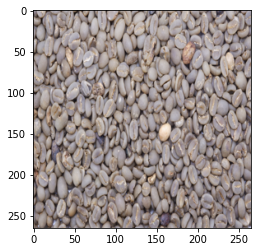

In [ ]:
plt.imshow(image_list[20])

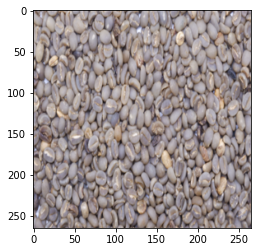

In [ ]:
plt.imshow(image_list[200])

Preprocessing using Cropping

In [ ]:
def crop_center(image, x, y, w, h):
  cropping = image[y:y+h, x: x+w]
  return cropping

In [ ]:
listImgCrop = []
for cropimage in arrayImages:
  crop = crop_center(cropimage, 25, 25, 265, 265)
  listImgCrop.append(crop)
print("jumlah yang di crop = ", len(listImgCrop))

jumlah yang di crop =  900


In [ ]:
np.array(listImgCrop[2]).shape

(240, 240, 3)

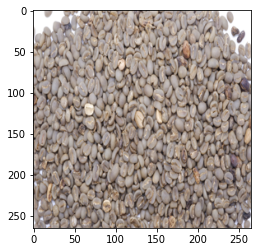

In [ ]:
plt.imshow(arrayImages[2])

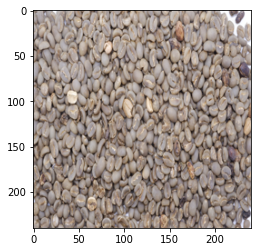

In [ ]:
plt.imshow(listImgCrop[2])

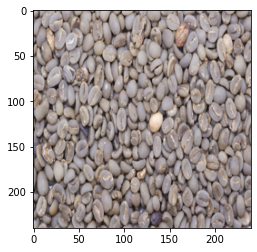

In [ ]:
plt.imshow(listImgCrop[20])

In [ ]:
np.array(listImgCrop[20]).shape

(240, 240, 3)

# Color Histogram

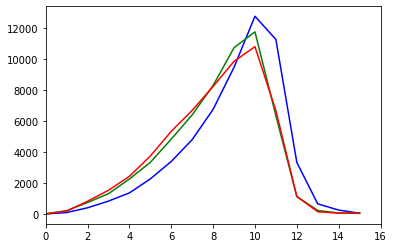

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([listImgCrop[5]],[i],None,[16],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,16])
plt.show()

In [ ]:
def getColorHistogram(rgb_image, channel):
  colHist = cv2.calcHist(rgb_image, [channel], None, [16], [0,256])
  (hist, _) = np.histogram(colHist, bins=16)
  return hist, colHist

In [ ]:
def getColorAverage(rgb_image):
  getAverage_row = np.average(rgb_image, axis=0)
  getAverage = np.average(getAverage_row, axis=0)
  return getAverage

In [ ]:
def getRedAverage(red_image):
  redAverage_row = np.average(red_image, axis=0)
  redAverage = np.average(redAverage_row, axis=0)
  return redAverage

In [ ]:
def getMedian(rgb_image):
  median_imagerow = np.median(rgb_image, axis=0)
  median_image = np.median(median_imagerow, axis=0)
  return median_image

In [ ]:
from scipy import stats

def getMode(chist):
  mode_image = stats.mode(chist, axis=0)
  return mode_image

In [ ]:
listColHist = [] #list Color Histogram
listImgHist = [] #list image Color Histogram
redchannel = []
bluechannel = []
greenchannel = []
listAverage = []
redAvgs = []
medians = []
modes = []
for image in listImgCrop:
  chist_red, img = getColorHistogram(image, 0)
  chist_green, img = getColorHistogram(image, 1)
  chist_blue, img = getColorHistogram(image, 2)

  average_img = getColorAverage(image)
  #red_avg = getRedAverage((chist_red, 0))

  totalHist = np.concatenate((chist_red, chist_green))
  totalHist = np.concatenate((totalHist, chist_blue))

  #avg_color_per_row = np.average(totalHist, axis=0)
  #avg_color = np.average(avg_color_per_row)

  median = getMedian(image)
  #mode = getMode(totalHist)

  listColHist.append((totalHist))
  listImgHist.append(img)
  redchannel.append(chist_red)
  bluechannel.append(chist_blue)
  greenchannel.append(chist_green)
  listAverage.append(average_img)
  #redAvgs.append(red_avg)
  medians.append(median)
  #modes.append(mode)
  
  
print("Jumlah Citra: ", len(listColHist))

Jumlah Citra:  900


In [ ]:
len(listAverage)
np.array(listAverage).shape

(900, 3)

In [ ]:
averagemode = stats.mode(listAverage[20])
np.array(averagemode).shape

(2, 1)

In [ ]:
modeavg = []
for ma in listAverage:
  modeaverage = stats.mode(ma)
  modeavg.append(ma)

In [ ]:
len(modeavg)

900

In [ ]:
np.array(modeavg).shape

(900, 3)

In [ ]:
listAverage[20]

array([148.61019097, 136.72435764, 133.69682292])

In [ ]:
print(medians)

[array([161.25, 145.  , 131.5 ]), array([158. , 144.5, 139. ]), array([159.25, 144.  , 135.  ]), array([160.25, 146.25, 138.  ]), array([159. , 146.5, 144. ]), array([159.  , 145.25, 142.5 ]), array([158., 145., 143.]), array([157. , 144.5, 141. ]), array([156.75, 144.5 , 143.  ]), array([159., 146., 145.]), array([159. , 146. , 143.5]), array([158.  , 145.75, 143.  ]), array([159.5, 147. , 146.5]), array([159.  , 146.  , 144.75]), array([158.75, 146.5 , 144.25]), array([158.  , 145.  , 142.75]), array([157. , 144.5, 140. ]), array([158.  , 145.5 , 144.25]), array([159.25, 147.  , 144.  ]), array([159.5, 147. , 142.5]), array([157.5, 145. , 142. ]), array([160. , 146.5, 145. ]), array([158.25, 146.  , 143.  ]), array([157.5 , 145.25, 144.  ]), array([158.5, 146. , 146.5]), array([157.5 , 145.  , 144.75]), array([158.5, 146. , 143.5]), array([159.  , 146.75, 144.5 ]), array([159., 146., 144.]), array([159. , 146.5, 143. ]), array([161., 148., 146.]), array([160.  , 147.5 , 145.25]), arr

In [ ]:
np.array(medians).shape

(900, 3)

### Concatenate All Features Extraction Histogram (Rmean, Gmean, Bmean, Medians, Modes)

In [ ]:
FeatureHistogram = np.concatenate((listAverage, medians), axis=1)
FeatureHistogram = np.concatenate((FeatureHistogram, modeavg), axis=1)
print("Citra Feature Histogram: ", len(FeatureHistogram))
np.array(FeatureHistogram).shape

Citra Feature Histogram:  900


(900, 9)

In [ ]:
FeatureHistogram[2]

array([152.26161458, 138.18381944, 129.85505208, 159.25      ,
       144.        , 135.        , 152.26161458, 138.18381944,
       129.85505208])

In [ ]:
len(listColHist)

900

In [ ]:
avgListHist = np.average(listColHist, axis=0)
print(avgListHist)
len(avgListHist)

[5.85333333 1.55888889 1.13111111 0.94       0.79888889 0.64222222
 0.54777778 0.49555556 0.41666667 0.42222222 0.46       0.40888889
 0.39444444 0.35222222 0.31       1.26777778 5.81333333 1.61111111
 1.12111111 0.95       0.81222222 0.65       0.51333333 0.47888889
 0.40777778 0.43444444 0.42777778 0.44777778 0.40555556 0.32555556
 0.3        1.30111111 5.81333333 1.59111111 1.10777778 1.03444444
 0.77777778 0.65       0.51       0.44555556 0.44555556 0.42
 0.45888889 0.39444444 0.40555556 0.34       0.31222222 1.29333333]


48

Mean / Average warna per channel semua gambar dalam list

[5.85333333 1.55888889 1.13111111 0.94       0.79888889 0.64222222
 0.54777778 0.49555556 0.41666667 0.42222222 0.46       0.40888889
 0.39444444 0.35222222 0.31       1.26777778]


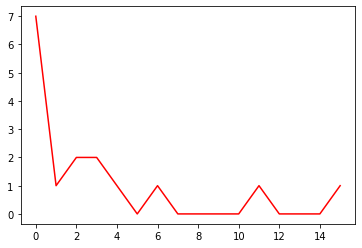

In [ ]:
plt.plot(redchannel[20], "r")
plt.show
avg_red = np.average(redchannel, axis=0)
print(avg_red)

array([5.81333333, 1.59111111, 1.10777778, 1.03444444, 0.77777778,
       0.65      , 0.51      , 0.44555556, 0.44555556, 0.42      ,
       0.45888889, 0.39444444, 0.40555556, 0.34      , 0.31222222,
       1.29333333])

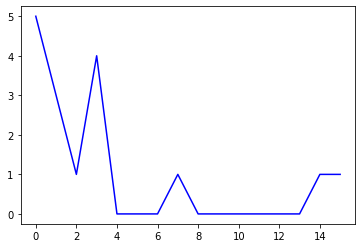

In [ ]:
plt.plot(bluechannel[20], "blue")
plt.show
avg_blue = np.average(bluechannel, axis=0)
avg_blue

array([5.81333333, 1.61111111, 1.12111111, 0.95      , 0.81222222,
       0.65      , 0.51333333, 0.47888889, 0.40777778, 0.43444444,
       0.42777778, 0.44777778, 0.40555556, 0.32555556, 0.3       ,
       1.30111111])

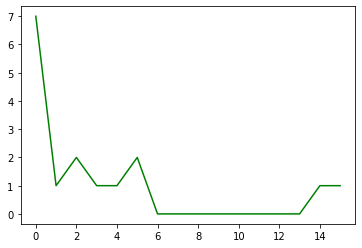

In [ ]:
plt.plot(greenchannel[20], "green")
plt.show
avg_green = np.average(greenchannel, axis=0)
avg_green

In [ ]:
256 * 3

768

In [ ]:
np.array(listColHist).shape

(900, 48)

# LBP Using Library

In [ ]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [ ]:
listHistLBP = []
listImgLBP = []
for image in listImgCrop:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  900


In [ ]:
np.array(listImgCrop).shape

(900, 240, 240, 3)

In [ ]:
np.array(listHistLBP).shape

(900, 256)

In [ ]:
np.array(listImgLBP).shape

(900, 240, 240)

(array([208.,  20.,  11.,   3.,   5.,   2.,   2.,   0.,   3.,   2.]),
 array([0.        , 0.00553472, 0.01106944, 0.01660417, 0.02213889,
        0.02767361, 0.03320833, 0.03874306, 0.04427778, 0.0498125 ,
        0.05534722]),
 <a list of 10 Patch objects>)

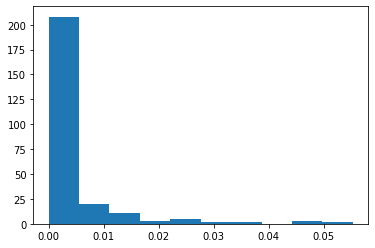

In [ ]:
plt.hist(listHistLBP[20])

In [ ]:
np.array(listColHist).shape

(900, 48)

In [ ]:
np.array(listHistLBP).shape

(900, 256)

In [ ]:
np.array(listAverage).shape

(900, 3)

In [ ]:
#listFeature = np.concatenate((listHistLBP, listColHist), axis=1)
#listFeature = np.concatenate((listHistLBP, listAverage), axis=1)
allFeature = np.concatenate((listHistLBP, FeatureHistogram), axis=1)

In [ ]:
#listFeature.shape

In [ ]:
256 + 9 #256 feature LBP + 9 Feature Histogram

265

In [ ]:
allFeature.shape

(900, 265)

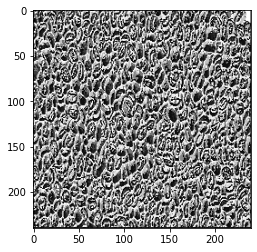

In [ ]:
plt.imshow(listImgLBP[2], cmap="gray")

# Random Forrest Classifier

In [ ]:
# coba satuin list histogram LBP sama Histogram Color
# imagesHist = listColHist, listHistLBP

### LBP Parameter





In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training LBP Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.7898230088495575


#### Testing LBP Random Forrest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)


#print("Akurasi", accuracy_score(y_test, y_pred))
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8114478114478114


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[48  6  2  0  0]
 [ 5 44 13  0  0]
 [ 3  9 53  7  0]
 [ 0  0  0 50  2]
 [ 0  0  0  9 46]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        56
           1       0.75      0.71      0.73        62
           2       0.78      0.74      0.76        72
           3       0.76      0.96      0.85        52
           4       0.96      0.84      0.89        55

    accuracy                           0.81       297
   macro avg       0.82      0.82      0.82       297
weighted avg       0.82      0.81      0.81       297



Validation LBP + Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data validation: ", len(X_val))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_val, y_pred))

Akurasi 0.8278145695364238


### Color Histogram using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training Histogram using Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.7654867256637168


### Testing Histogram using Random Forrest

In [ ]:
#   from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.7171717171717171


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  8  2  0  3]
 [12 35  8  7  0]
 [ 8 26 33  5  0]
 [ 0  2  1 48  1]
 [ 0  0  0  1 54]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        56
           1       0.49      0.56      0.53        62
           2       0.75      0.46      0.57        72
           3       0.79      0.92      0.85        52
           4       0.93      0.98      0.96        55

    accuracy                           0.72       297
   macro avg       0.73      0.74      0.72       297
weighted avg       0.72      0.72      0.71       297



Validation Test Color Histogram + Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data validasi: ", len(X_val))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_val, y_pred))

Akurasi 0.695364238410596


#### Training Concatenate Histogram + LBP using Random Forrest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.8584070796460177


#### Testing concatenate Histogram + LBP using Random Forrest

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8585858585858586


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[52  0  4  0  0]
 [ 7 42 12  1  0]
 [ 1  8 58  5  0]
 [ 0  0  0 51  1]
 [ 0  0  0  3 52]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.84      0.68      0.75        62
           2       0.78      0.81      0.79        72
           3       0.85      0.98      0.91        52
           4       0.98      0.95      0.96        55

    accuracy                           0.86       297
   macro avg       0.86      0.87      0.86       297
weighted avg       0.86      0.86      0.86       297



Validation Testing Concate + Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data validasi: ", len(X_val))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_val, y_pred))

Akurasi 0.8410596026490066


# KNN Classifier

In [ ]:
from sklearn.model_selection import train_test_split

### Training LBP using KNN

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.9038142620232172


Testing LBP using KNN

In [ ]:
# from sklearn.model_selection import train_test_split
# #X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
y_pred = neigh.predict(X_test)
print("Akurasi KNN = ", accuracy_score(y_test, y_pred))

Akurasi KNN =  0.835016835016835


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[45  6  5  0  0]
 [ 6 44 11  1  0]
 [ 1  8 61  2  0]
 [ 0  1  2 48  1]
 [ 0  0  0  5 50]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        56
           1       0.75      0.71      0.73        62
           2       0.77      0.85      0.81        72
           3       0.86      0.92      0.89        52
           4       0.98      0.91      0.94        55

    accuracy                           0.84       297
   macro avg       0.84      0.84      0.84       297
weighted avg       0.84      0.84      0.84       297



Validation KNN LBP test

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data validation: ", len(X_val))

Jumlah data train:  452
Jumlah data validation:  151


In [ ]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.86813187 0.81318681 0.83333333 0.78888889 0.81111111]
cv_scores mean:0.8229304029304029


### Color histogram using KNN

#### Training Color Histogram using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.8374792703150912


#### Testing Color Histogram using KNN 

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X_test, y_test)
y_pred = neigh.predict(X_test)
print("Akurasi KNN = ", accuracy_score(y_test, y_pred))

Akurasi KNN =  0.7609427609427609


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  8  1  2  1]
 [13 36  8  5  0]
 [ 6 17 46  3  0]
 [ 0  2  3 45  2]
 [ 0  0  0  0 55]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        56
           1       0.57      0.58      0.58        62
           2       0.79      0.64      0.71        72
           3       0.82      0.87      0.84        52
           4       0.95      1.00      0.97        55

    accuracy                           0.76       297
   macro avg       0.77      0.77      0.77       297
weighted avg       0.76      0.76      0.76       297



#### Validating Histogram using KNN

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data validation: ", len(X_val))

Jumlah data train:  452
Jumlah data validation:  151


In [ ]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.75824176 0.74725275 0.71111111 0.71111111 0.76666667]
cv_scores mean:0.738876678876679


#### Training Concate using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.8374792703150912


#### Testing Concate using KNN

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X_test, y_test)
y_pred = neigh.predict(X_test)
#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN = ", accuracy_score(y_test, y_pred))

Akurasi KNN =  0.7609427609427609


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  8  1  2  1]
 [13 36  8  5  0]
 [ 6 17 46  3  0]
 [ 0  2  3 45  2]
 [ 0  0  0  0 55]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        56
           1       0.57      0.58      0.58        62
           2       0.79      0.64      0.71        72
           3       0.82      0.87      0.84        52
           4       0.95      1.00      0.97        55

    accuracy                           0.76       297
   macro avg       0.77      0.77      0.77       297
weighted avg       0.76      0.76      0.76       297



### Validating Concate using KNN

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data validation: ", len(X_val))

Jumlah data train:  452
Jumlah data validation:  151


In [ ]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.75824176 0.74725275 0.71111111 0.71111111 0.76666667]
cv_scores mean:0.738876678876679


# SVM Classifier

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
# from sklearn import svm
# clf = svm.SVC(gamma="auto")
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

In [ ]:
# from sklearn import metrics
# print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.1750841750841751


# ANN Classifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
input_shape = (256, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              526336    
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2

In [ ]:
#label[label == 3] = 0

label

# 0 1 2

0      0
1      0
2      0
3      0
4      0
      ..
895    4
896    4
897    4
898    4
899    4
Name: label, Length: 900, dtype: int64

In [ ]:
y = to_categorical(label, num_classes=5)

In [ ]:
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
listHistLBP_new = np.array(listHistLBP)
listHistLBP_new.shape

# 1 2 3 => dibaca 4 kelas karna mulai 0
# 0 1 2

(900, 256)

In [ ]:
FeatureHistogram_new = np.array(FeatureHistogram)
FeatureHistogram_new.shape

(900, 9)

## ANN with LBP feature

---



### Training LBP using ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 73ms/step - loss: 1.6101 - accuracy: 0.1852 - val_loss: 1.6150 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.6021 - accuracy: 0.2391 - val_loss: 1.6240 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 1s 50ms/step - loss: 1.6154 - accuracy: 0.2088 - val_loss: 1.6223 - val_accuracy: 0.1791
Epoch 4/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.6042 - accuracy: 0.2256 - val_loss: 1.6191 - val_accuracy: 0.1791
Epoch 5/1000
10/10 [==============================] - 1s 54ms/step - loss: 1.6021 - accuracy: 0.2492 - val_loss: 1.6134 - val_accuracy: 0.1791
Epoch 6/1000
10/10 [==============================] - 1s 51ms/step - loss: 1.5970 - accuracy: 0.2391 - val_loss: 1.6060 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.5916 - accuracy: 0.2626 - val_loss: 1.6023 - val_accuracy: 0.1791

#### Testing LBP using ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

NameError: ignored

## ANN with Color Histogram

In [ ]:
input_shape = (9, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2048)              20480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 41ms/step - loss: 25.8508 - accuracy: 0.2090 - val_loss: 9.0259 - val_accuracy: 0.1886
Epoch 2/1000
19/19 [==============================] - 1s 34ms/step - loss: 10.4025 - accuracy: 0.2255 - val_loss: 2.5500 - val_accuracy: 0.1886
Epoch 3/1000
19/19 [==============================] - 1s 33ms/step - loss: 4.2817 - accuracy: 0.1675 - val_loss: 1.6154 - val_accuracy: 0.1886
Epoch 4/1000
19/19 [==============================] - 1s 34ms/step - loss: 2.4601 - accuracy: 0.1725 - val_loss: 1.6250 - val_accuracy: 0.1886
Epoch 5/1000
19/19 [==============================] - 1s 34ms/step - loss: 2.0559 - accuracy: 0.2123 - val_loss: 1.6159 - val_accuracy: 0.1751
Epoch 6/1000
19/19 [==============================] - 1s 34ms/step - loss: 1.9049 - accuracy: 0.1940 - val_loss: 1.6146 - val_accuracy: 0.2088
Epoch 7/1000
19/19 [==============================] - 1s 34ms/step - loss: 1.8601 - accuracy: 0.1924 - val_loss: 1.6129 - val_accuracy: 0.24

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 0s 49ms/step - loss: 1.6181 - accuracy: 0.1751 - val_loss: 1.6077 - val_accuracy: 0.2123
Epoch 2/1000
10/10 [==============================] - 0s 39ms/step - loss: 1.6175 - accuracy: 0.1751 - val_loss: 1.6077 - val_accuracy: 0.2123
Epoch 3/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6164 - accuracy: 0.1751 - val_loss: 1.6078 - val_accuracy: 0.2123
Epoch 4/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6161 - accuracy: 0.1751 - val_loss: 1.6078 - val_accuracy: 0.2123
Epoch 5/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6152 - accuracy: 0.1751 - val_loss: 1.6079 - val_accuracy: 0.2123
Epoch 6/1000
10/10 [==============================] - 0s 39ms/step - loss: 1.6145 - accuracy: 0.1751 - val_loss: 1.6080 - val_accuracy: 0.2123
Epoch 7/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6142 - accuracy: 0.1751 - val_loss: 1.6081 - val_accuracy: 0.2123

ANN For Concate Methods

In [ ]:
input_shape = (265, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2048)              544768    
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 54ms/step - loss: 32.6262 - accuracy: 0.1785 - val_loss: 22.2967 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 44ms/step - loss: 25.5505 - accuracy: 0.1414 - val_loss: 9.5262 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 0s 44ms/step - loss: 12.9111 - accuracy: 0.2189 - val_loss: 2.2582 - val_accuracy: 0.2073
Epoch 4/1000
10/10 [==============================] - 0s 45ms/step - loss: 7.3901 - accuracy: 0.2121 - val_loss: 2.4565 - val_accuracy: 0.2056
Epoch 5/1000
10/10 [==============================] - 0s 43ms/step - loss: 4.7610 - accuracy: 0.2054 - val_loss: 1.7870 - val_accuracy: 0.1957
Epoch 6/1000
10/10 [==============================] - 0s 44ms/step - loss: 3.3897 - accuracy: 0.2020 - val_loss: 1.6562 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 0s 43ms/step - loss: 2.8678 - accuracy: 0.1886 - val_loss: 1.6158 - val_accuracy: 0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 57ms/step - loss: 1.6039 - accuracy: 0.2424 - val_loss: 1.6233 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6031 - accuracy: 0.2424 - val_loss: 1.6234 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6022 - accuracy: 0.2424 - val_loss: 1.6230 - val_accuracy: 0.1791
Epoch 4/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6029 - accuracy: 0.2424 - val_loss: 1.6227 - val_accuracy: 0.1791
Epoch 5/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6029 - accuracy: 0.2424 - val_loss: 1.6226 - val_accuracy: 0.1791
Epoch 6/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6035 - accuracy: 0.2424 - val_loss: 1.6225 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6023 - accuracy: 0.2424 - val_loss: 1.6226 - val_accuracy: 0.1791

In [ ]:
input_shape = (259, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 2048)              532480    
_________________________________________________________________
dropout_21 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 58ms/step - loss: 20.2391 - accuracy: 0.2054 - val_loss: 5.0997 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 48ms/step - loss: 10.0816 - accuracy: 0.1919 - val_loss: 4.7441 - val_accuracy: 0.2123
Epoch 3/1000
10/10 [==============================] - 0s 46ms/step - loss: 7.2070 - accuracy: 0.1684 - val_loss: 1.8285 - val_accuracy: 0.2123
Epoch 4/1000
10/10 [==============================] - 0s 45ms/step - loss: 3.9637 - accuracy: 0.1953 - val_loss: 1.7952 - val_accuracy: 0.1957
Epoch 5/1000
10/10 [==============================] - 0s 46ms/step - loss: 2.9890 - accuracy: 0.1684 - val_loss: 1.6533 - val_accuracy: 0.1957
Epoch 6/1000
10/10 [==============================] - 0s 45ms/step - loss: 2.6051 - accuracy: 0.1953 - val_loss: 1.6392 - val_accuracy: 0.1957
Epoch 7/1000
10/10 [==============================] - 0s 45ms/step - loss: 2.2720 - accuracy: 0.2121 - val_loss: 1.6291 - val_accuracy: 0.17

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.6228 - accuracy: 0.1791 - val_loss: 1.6026 - val_accuracy: 0.2424
Epoch 2/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6207 - accuracy: 0.1791 - val_loss: 1.6028 - val_accuracy: 0.2424
Epoch 3/1000
19/19 [==============================] - 1s 36ms/step - loss: 1.6185 - accuracy: 0.1791 - val_loss: 1.6031 - val_accuracy: 0.2424
Epoch 4/1000
19/19 [==============================] - 1s 38ms/step - loss: 1.6174 - accuracy: 0.1791 - val_loss: 1.6035 - val_accuracy: 0.2424
Epoch 5/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6156 - accuracy: 0.1791 - val_loss: 1.6040 - val_accuracy: 0.2424
Epoch 6/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6151 - accuracy: 0.1791 - val_loss: 1.6047 - val_accuracy: 0.2424
Epoch 7/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6140 - accuracy: 0.1758 - val_loss: 1.6054 - val_accuracy: 0.2424